# Mini-Project: Deception Detection using Machine Learning

## 1. Author

#### Student Name: Mansi Sunil Jadhav
#### Student ID: 240087524

## 2. Problem Formulation:

We aim to develop a machine learning model capable of distinguishing between true and deceptive audio stories. This **classification** task falls under **supervised learning** where the goal is to predict binary labels, truth or lie, by using the audio features extracted from the given recordings.

Deception detection is an interesting problem to solve and has it's applications in law enforcement, behavioral study and security. Experts in the field can identify whether a person is lying by observing speech patterns, tone, etc. However, this is a manual process subject to human bias. Using machine learning, we can process large amounts of data in a matter of minutes and eliminate bias.

## 3. Methodology

We will be following the **deployment first** approach for this project, which means we will first identify the problem, design the pipelines required, build the train, validation and test tasks and then collect the data, extract features and run those previously defined pipelines.

We will be splitting our dataset into three parts: **train, validation and test**. We will leave the test dataset aside, this can be directly used at the end to test the final ML model.
We'll first split the entire dataset into 80:20 ratio as train and test. Then, we can again split the training data (80% of total) into 85:15 ratio as train and validation.

We will start by training various models using the training data and test them on the validation data. Depending on the results, we can choose the best family of models. We will also change the parameters under the selected family of models and choose the one that gives us best results. Once we're happy with our model, we can then train it on the entire dataset (training plus validation) and test it on the **unseen** test data.

To choose the best performing model, we will plot the **Confusion Matrix** and print the **Classification Report**. These will help us get the below parameters:
<br>**Accuracy**: We will most likely go for a model with a high accuracy on the validation dataset, as long as it is not overfitting*. 
<br>**Precision**: Precision will show us how often our model correctly predicts the positive class. It is the number of True Positives by the total number of positives (True and False Positives).
<br>**Recall**: Recall will show us how many of the total positive instances were correctly predicted by the model.
<br>**F1-score:** It is the harmonic mean of precision and recall and is especially used in case of imbalanced datasets.

*Overfitting: The model would perform very well on training data, but will show poor performance on the validation/test data.

## 4. Implemented ML prediction pipelines

The collected dataset consists of audio files of length between 2 to 4mins. For the purpose of our project, we will be splitting these audio files into chunks of 30 seconds each. 
Once we have the files, we will extract audio features from these files, go for feature engineering and dimensionality reduction. After that, we will split the dataset into train, validation and test. We will then build and train the machine learning model.

### 4.1 Transformation Stage

**Input:** The input to this stage will be the path to the audio recordings or the .wav files and labels for each.

We will first split all audio files into chunks of **30 seconds**. If the last chunk of the audio file is not exactly 30 seconds, we will check it's length. If it's more than 10 seconds, we will **overlap** it with the previous chunk, otherwise, we will **discard** the chunk. 

Once we have the 30 second chunks, we will **reduce the noise** in all these files so that it is easier to extract important features. 
<br>Then, we will extract below audio features using python libraries.
1. **Power:** The rate at which sound energy is emitted could be an indicator of decpetion. Hence, we will extract this feature using the audio time series.
2. **Pitch:** High pitch could be another indicator of deception. If the mean of the pitch of the speaker is higher than the baseline, we can say that the speaker is lying. Also, if the variablity in the pitch is high, this could also suggest nervousness which can be related to deception. Hence we're calculating mean and standard deviation of the pitch.
3. **Voiced Fraction:** It is the likelihood that a specific audio frame contains voiced speech. This can help us calculate the fractions of audio that are voiced.
4. **Silence Ratio:** This is different from voiced fraction. This tells us the amount of pauses the speaker takes while speaking. This could be an indicator of deception as one takes more pauses (shows hesitations in speech) while lying. 
5. **Zero-Crossing Rate:** ZCR measures the rate at which a signal changes sign (crosses the zero amplitude level). Hesitations in speech or sudden bursts of energy while talking can cause variations in ZCR. These may correlate with stress associated while speaking lies. 
6. **MFCC Features:** Mel frequency cepstral coefficients represent the spectral characteristics of an audio signal. Cepstral coefficients are accurate in pattern recognition problems related to human voice. Most of the important information is available in the first few coefficients. Hence, I've chosen 13 features for this project based on references.

**Independence:** Once we have this final dataset, we can split it into train, validation and test datasets using **GroupShuffleSplit**. Note that we have given a **group ID** to each audio file and made sure that chunks of one file do not get split into different datasets. This ensures independence as all the chunks of one audio file will be present in only one dataset. 

**Scaling:** We're using **Standard Scaler** to scale all the features. This is because it transforms the mean to 0 and variance to 1. Many machine learning algorithms (e.g., logistic regression, SVMs, and neural networks) assume that the features are centered around zero and scaled to a similar range. StandardScaler ensures that all features contribute equally to the model by normalizing their magnitude. Without scaling, features with larger magnitudes might dominate the training process. We can use MinMaxScaler if we're going to use neural networks.

**Dimensionality Reduction:** Handling high dimensional data can be computationally challenging, hence we will go for dimensionality reduction using **PCA**. This will reduce redundant or less relevant features while still capturing the essential structure. This will also help to avoid overfitting to our train data.

**Output:** The ouput of this stage will be a feature matrix which can be used to train and test the model. 

### 4.2 Model Stage

**Input:** Training and Test Datasets with final extracted features scaled to form a feature matrix. 
<br>**Model:** In this stage, we built a few different models, trained them on the training dataset and tested on the validation dataset. We tried using models such as Logistic Regression, SVM, Decision Tree Classifier and Random Forest Classifier. However, the simplest model of them all, **Logistic Regression** performed the best based on the calculated parameters as shared in the next section. Hence, we have used Logistic Regression in this case to visualise our results. Additionally, as we do not have a properly balanced dataset in our case, we have tried to use the **'class_weight=balanced'** parameter from Logistic Regression. This gave us a slightly better result than without balancing. Note that **LinearSVC** also performed quite well for our problem, but Logistic Regression gave a slightly higher precision and accuracy.
<br> We have also tried different **solvers** under Logistic Regression like 'liblinear', 'saga', etc along with different **Regularization** techniques such as 'l1', 'l2' and 'elasticnet'. However, we saw similar results on these and opted to go for the default parameters. 
<br>**Output:** A trained model, ready to be used on the validation or test dataset.

### 4.3 Ensemble Stage

We've tried a few ensemble models like **Random Forest Classifier** and boosting techniques like **Adaboost Classifier** and **Gradient Boost Classifier**. However, these models seem too complex for the dataset at hand. As we have a small dataset, these models are overfitting on the training data and performing poorly when presented with validation dataset. Hence, I've opted not to go for any ensemble methods in the final code. 

## 5. Dataset

My classmates and I have collected a dataset of around 600 audio recordings, 300 true and 300 deceptive. Each of these recordings are around 2-4mins long. Out of these, we have selected 100 recordings (50 true and 50 deceptive) for this project. We will split these audio recordings into chunks of 30 seconds as explained in the Transformation section and then extract audio features from these as shown below. 

**We will install all the necessary libraries in this section before starting the code.**
<br>**Please uncomment below lines of code if you do not have these libraries installed.**

In [118]:
# pip install mlend==1.0.0.4

In [119]:
# pip install librosa

In [120]:
# pip install pydub

In [121]:
# pip install soundfile

In [122]:
# pip install noisereduce

In [123]:
import mlend
from mlend import download_deception_small, deception_small_load

datadir = download_deception_small(save_to='MLEnd', subset={}, verbose=1, overwrite=False)

df, _, MAPs = deception_small_load(datadir_main=datadir, train_test_split=None, verbose=1, encode_labels=True)

import numpy as np
import pandas as pd

df = pd.DataFrame(df)   # Converting it to a DataFrame for better visualisation
df.drop('Y', axis=1, inplace=True)
df.rename(columns={'Y_encoded': 'Y'}, inplace=True)
df.head()

100%|▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓|100\100|00100.wav
Done!
Total 100 found in MLEnd/deception/MLEndDD_stories_small/


,X_paths,Y
0,MLEnd/deception/MLEndDD_stories_small/00001.wav,1
1,MLEnd/deception/MLEndDD_stories_small/00002.wav,0
2,MLEnd/deception/MLEndDD_stories_small/00003.wav,1
3,MLEnd/deception/MLEndDD_stories_small/00004.wav,1
4,MLEnd/deception/MLEndDD_stories_small/00005.wav,1


In [124]:
from pydub import AudioSegment
import librosa
import glob

import warnings
warnings.filterwarnings("ignore")

def split_audio(file_paths, labels, new_file_paths, new_labels, group, segment_length=30000, min_threshold=10000, output_folder='MLEnd/deception/split_audios'):
    for file_path, labels in zip(file_paths, labels):  # We loop through the file paths and labels for the input audio files - 2 to 4mins long
        with open(file_path, 'rb') as file:
            audio = AudioSegment.from_file(file_path)  # Load the audio file
            total_length = len(audio)
        
            chunks = []  # Chunks of 30secs eah
            for start_time in range(0, total_length, segment_length):  # segment length will be 30secs
                end_time = min(start_time + segment_length, total_length) # End time will be the end time of the audio (total length) in case of the last chunk
                chunk = audio[start_time:end_time] # Get the chunk
                chunks.append(chunk)
            
            if len(chunks[-1]) < segment_length:  # Handling the last chunk
                if len(chunks[-1]) > min_threshold:  # Overlap in case the length is greater than the minimum threshold - 10secs in our case
                    overlap_start = max(0, total_length - segment_length)  # Overlap such that the start of the chunk will be grabbed from end of the previous chunk
                    chunks[-1] = audio[overlap_start:total_length]  
                else:
                    chunks.pop(-1) # Discard the last chunk if it is too short
            
            for i, chunk in enumerate(chunks):
                output_path = f"{output_folder}/{file_path[-9:-4]}_{i}.wav"   # Define names for the new files
                new_file_paths.append(output_path)  # Store the new file paths
                new_labels.append(labels) # Store the labels for each chunk
                group.append(f"{file_path[-7:-4]}")  # Assign a group ID for each chunk
                with open(output_path, 'wb') as out_file:
                    chunk.export(output_path, format="wav")  # Creates the new files in the output folder
                    
    print(f"{len(new_file_paths)} total chunks created after splitting.")
    
    return new_file_paths, new_labels, group

In [125]:
import noisereduce as nr
import soundfile as sf 

def reduce_noise(filepaths):
    count = 0
    for file in filepaths:
        count +=1
        y, sr = librosa.load(file)  # Load the file and get audio time series and sampling rate
        y_denoised = nr.reduce_noise(y=y, sr=sr)  # USe the predefined function from noisereduce library
        sf.write(file, y_denoised, sr)  # We will replace the files with denoised files
    print(f"Noise reduction for {count} files completed.")

In [126]:
def get_power_pitch_voiced_fr(y,sr,frame_length,hop_length):
    f0, voiced_flag, voiced_probs = librosa.pyin(y=y, fmin=80, fmax=450, sr=sr, frame_length=frame_length,hop_length=hop_length) 
    # f0 - time series of fundamental frequencies in Hertz
    # voiced flag - time series containing boolean flags indicating whether a frame is voiced or not.
    # voiced prob - time series containing the probability that a frame is voiced.
    power = np.sum(y**2)/len(y)  # Calculate the power of the audio signal
    pitch_mean = np.nanmean(f0) if np.mean(np.isnan(f0))<1 else 0  # Get mean of the pitch
    pitch_std  = np.nanstd(f0) if np.mean(np.isnan(f0))<1 else 0  # Get standard deviation of the pitch
    voiced_fr = np.mean(voiced_flag)   # Get the fraction of segments that are voiced in the audio
    
    return power, pitch_mean, pitch_std, voiced_fr

def get_zero_crossing_rate(y, frame_length, hop_length):
    zcr = librosa.feature.zero_crossing_rate(y)  # Predefined function from librosa to calculate ZCR
    zcr_mean = np.mean(zcr)  # Mean of ZCR
    zcr_std = np.std(zcr)   # Standard Deviation of ZCR
    return zcr_mean,zcr_std

def get_mfcc_features(y, sr, n_mfcc=13):
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)  # Predefined function from librosa to calculate MFCC
    mfcc_mean = np.mean(mfcc, axis=1)  # Returns n means of all mfcc features
    mfcc_std = np.std(mfcc, axis=1)    # Returns n Standard deviations of mfcc features
    return mfcc_mean, mfcc_std

def get_silence_ratio(y, sr, frame_length, hop_length, total_audio_duration, silence_threshold=-40,):
    non_silent_intervals = librosa.effects.split(y, top_db=abs(silence_threshold), frame_length=frame_length, hop_length=hop_length) # Calculate the non silent intervals
    silences = []
    for i in range(1, len(non_silent_intervals)):
        silence_start = non_silent_intervals[i-1][1]   # Start of silence
        silence_end = non_silent_intervals[i][0]    # End of silence or start of voiced region
        silence_duration = (silence_end - silence_start) / sr  # Amount of time the speaker was silent
        silences.append(silence_duration)   # Get all such instances

    total_silence_duration = sum(silences)    # Total duration when the speaker was silent throughout the audio
    silence_ratio = total_silence_duration / (total_audio_duration)

    return silence_ratio

In [127]:
from tqdm import tqdm

def get_X(files):
    X = []
    
    for file in tqdm(files):
    
        fs = 22050 # Default
        winLen=0.02
        p = winLen*fs
        frame_length = int(2**int(p-1).bit_length())
        hop_length = frame_length//2
        
        y, sr = librosa.load(file,sr=fs)  # y - audio time series, sr - sampling rate of y
        y = y/np.max(np.abs(y))  # Scaled y
    
        power, pitch_mean, pitch_std, voiced_fr = get_power_pitch_voiced_fr(y,sr,frame_length,hop_length)
    
        zcr_mean,zcr_std = get_zero_crossing_rate(y=y, frame_length=frame_length, hop_length=hop_length)
        
        total_audio_duration = 30.0  # We've split the files such that all the files are 30 second long
        silence_ratio = get_silence_ratio(y, sr, frame_length, hop_length, total_audio_duration)

        n_mfcc=13
        mfcc_mean,mfcc_std = get_mfcc_features(y, sr, n_mfcc)
    
        xi = [power,pitch_mean,pitch_std,voiced_fr,zcr_mean,zcr_std,silence_ratio,*mfcc_mean, *mfcc_std] # Get all the features into one single object.
        X.append(xi)
        
    return X

In [128]:
from sklearn.model_selection import GroupShuffleSplit

def split_dataset(X, y, groups, test_size=0.2):  # Input will be the features X, labels y and the groups for every audio file. 
    if not isinstance(X, pd.DataFrame):   # Convert to a Dataframe if not already done. This is only for simplicity of the task. We can also continue without this using a different approach.
        X = pd.DataFrame(X)
    if not isinstance(y, pd.DataFrame):
        y = pd.DataFrame(y)
    if not isinstance(groups, pd.DataFrame):
        groups = pd.DataFrame(groups)
    
# GroupShuffleSplit splits the dataset such that the chunks from one group are all assigned to one particular dataset. 
    gss = GroupShuffleSplit(test_size=test_size, n_splits=1, random_state=42)  # Split the entire dataset into train and test.
    for train_idx, test_idx in gss.split(X, y, groups):  # gss.split returns the indices to split the data -> Loop through these indices
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]    # Split X to get train and test sets
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]    # Split y to get train and test sets
        groups_train = groups.iloc[train_idx]      # We also split the groups, so that we can use it for the validation dataset.

    return X_train, X_test, y_train, y_test, groups_train

In [129]:
from sklearn.preprocessing import StandardScaler

def scale_data(X_train, X_test):
    
    scaler = StandardScaler()  # Create an instance of the standard scaler

    scaler.fit(X_train)  # Note that we're only fitting on the train data. We will not fit on the validation or test data to avoid data leakage.

    X_train_scaled = scaler.transform(X_train) # Transform the datasets
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled

In [130]:
from sklearn.decomposition import PCA

def apply_pca(X_train, X_test):

    pca = PCA(random_state=42) # Initialize PCA
    
    pca.fit(X_train) # Note that again we're only fitting on the training data.

    cumulative_variance = np.cumsum(pca.explained_variance_ratio_) # Calculate cumulative explained variance

    # The explained_variance_ratio_ in PCA represents the proportion of the dataset's total variance that each principal component explains. 
    # It helps quantify how much information (or variability) in the data is captured by each component.

    # We have set a minimum threshold of 95% for the cumulative variance
    n_components = np.argmax(cumulative_variance >= 0.95) + 1    # Choose the smallest number of components that meets the threshold.
    print(f"Number of components for 95% variance: {n_components}")

    pca = PCA(n_components=n_components, random_state=42)  # Initialize PCA with calculated number of components
    X_train_pca = pca.fit_transform(X_train)  # Fit on training data and transform both
    X_test_pca = pca.transform(X_test)

    return X_train_pca, X_test_pca

In [131]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

def model_report(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)  # Take in the model as input -> Here we are using Logistic Regression after testing various models
    preds = model.predict(X_test)  # Predict on the test/val dataset
    ConfusionMatrixDisplay(confusion_matrix(y_test,preds)).plot()  # Plot the confusion matrix
    print(classification_report(y_test, preds))  # Print the classification report

**Note:** Please create a folder 'MLEnd/deception/split_audios' to store the 30seconds files, else below code will give an error. 

In [132]:
X, y, groups = [], [], []

X, y, groups = split_audio(df['X_paths'], df['Y'], X, y, groups)   # Get the paths of 30secs audio files, their labels and groups

reduce_noise(X)  # Reduce the noise in each file

X = get_X(X)  # Extract the features from all audio files - This is a dataframe
print(len(X))
print(len(y))
print(len(groups))
X_train_val, X_test, y_train_val, y_test, groups_train = split_dataset(X, y, groups, test_size=0.20)  # Split the dataset into train and test -> Train = train + val
X_train, X_val, y_train, y_val, groups_train = split_dataset(X_train_val, y_train_val, groups_train, test_size=0.15)  # Split the training dataset into train and validation.

# Validation Task
X_train_scaled, X_val_scaled = scale_data(X_train, X_val)  # Scale all datasets

X_train_pca, X_val_pca = apply_pca(X_train_scaled, X_val_scaled)  # Dimensionality Reduction

# Testing Task
X_train_val_scaled, X_test_scaled = scale_data(X_train_val, X_test)  # Scale the X_train_val dataset which is training and validation combined

X_train_val_pca, X_test_pca = apply_pca(X_train_val_scaled, X_test_scaled)  # Dimensionality Reduction

486 total chunks created after splitting.
Noise reduction for 486 files completed.


100%|██████████| 486/486 [29:14<00:00,  3.61s/it]

486
486
486
Number of components for 95% variance: 20
Number of components for 95% variance: 21


## 6. Experiments and Results

Train and Test on the Training Dataset itself: **Only to check if the model is overfitting.**

              precision    recall  f1-score   support

           0       0.77      0.71      0.74       187
           1       0.67      0.73      0.70       149

    accuracy                           0.72       336
   macro avg       0.72      0.72      0.72       336
weighted avg       0.72      0.72      0.72       336



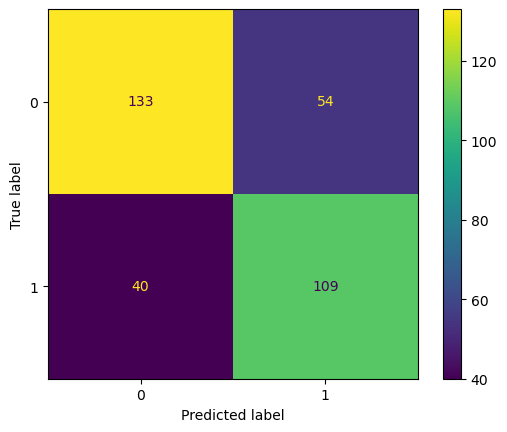

In [133]:
model = LogisticRegression(class_weight='balanced', random_state=42)

model_report(model, X_train_pca, X_train_pca, y_train, y_train)  # Train on training and test on the training dataset

**Validation Task:**

              precision    recall  f1-score   support

           0       0.65      0.44      0.53        34
           1       0.42      0.64      0.51        22

    accuracy                           0.52        56
   macro avg       0.54      0.54      0.52        56
weighted avg       0.56      0.52      0.52        56



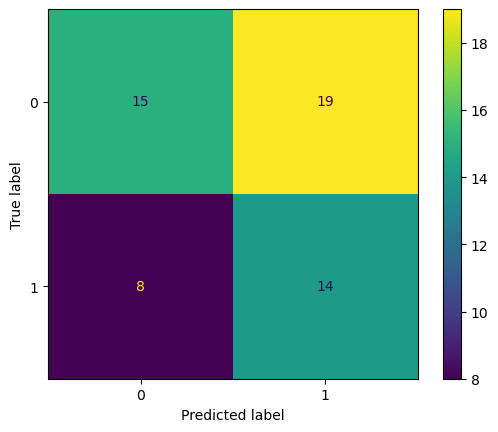

In [134]:
model_report(model, X_train_pca, X_val_pca, y_train, y_val)  # Train on training and test on the validation dataset

**Testing Task:**
<br>We will take the entire train dataset -> Train plus validation dataset.

              precision    recall  f1-score   support

           0       0.38      0.67      0.48        30
           1       0.76      0.48      0.59        64

    accuracy                           0.54        94
   macro avg       0.57      0.58      0.54        94
weighted avg       0.64      0.54      0.56        94



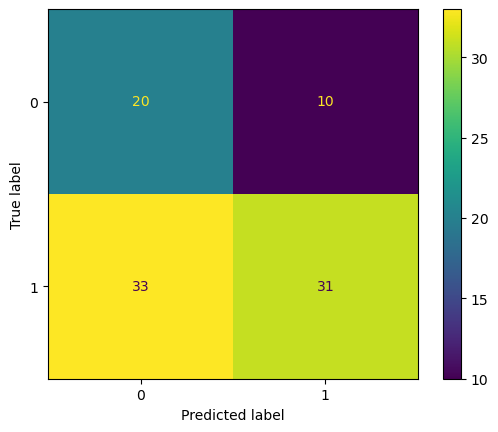

In [135]:
model_report(model, X_train_val_pca, X_test_pca, y_train_val, y_test)  # Test on the final unseen test dataset -> Train on Training + Validation dataset.

**Results:**
1. **Accuracy** -> The accuracy on the training dataset is 72%, which decreases to 52% in validation and goes up to 54% in the test dataset. This shows that the model is **overfitting** to the training data. We can go for techniques like **cross-validation** to avoid overfitting.
3. **Precision** -> In training and validation, the precision is higher for class 0 as compared to class 1, however in the test data it is the opposite. Despite the shift, the overall precision is not optimal for either of the datasets. This shows we need to handle **class imbalance**.
5. **Recall** -> Similar to precision, we can see the Recall has shifted in the test set too. The model is struggling to identify class 1 in the test dataset.
6. **F-1 score** -> F-1 score has shown a similar trend as precision and recall.

**-> The model is overfitting to the training dataset.**
<br>**-> The model shows inconsistent performance on the classes showing it is struggling to generalize.**

**Model Deployment:**

Here we can deploy our final model to be used for predicting any new unseeen datasets. Here we have trained our model on the entire dataset (training plus test).

In [138]:
from joblib import dump, load

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=20, random_state=42)
X_pca = pca.fit_transform(X)

final_model = LogisticRegression(class_weight='balanced', random_state=42)

final_model.fit(X_pca, y)

dump(final_model, 'deception_detection_model.joblib')   # Save the model as .joblib file for future use

loaded_model = load('deception_detection_model.joblib')   # The model can be loaded in this way

#loaded_model.predict()   # We can predict using the saved model -> Input will be a feature matrix derived from PCA.

## 7. Conclusions

In this project, we addressed the problem of **deception detection using machine learning**. We have achieved an **accuracy of 54%** using a **LogisticRegression** model on the test data. This model can be used to classify any unseen data in the future.  

Although we have tried to experiment and get good results, there are still a few points for improvement:
1. We can gather **larger amounts of data** to get better results with our models. The model is not able to capture important features using such a small dataset and tends to overfit. If we do not have more data, we can try going for **data augmentation** as well.
2. We can try to **balance the dataset** by introducing almost equal amounts of samples from both classes. This can help us improve the poor precision and recall we saw in our results.
4. We can go **feature selection**. We can drop some of the features which have very low correlation with our label before going for PCA.
5. We can work with **experts in audio analysis and psychology** to better understand the features that need to be extracted and how they can be interpreted. Extracting features that are more relevant to our problem can help us get better results.
6. We can try working with **deep learning models such as RNN** to predict the class here. Such models have shown better accuracy as supported by some of the papers mentioned in the references.

## 8. References

A. R. Bhamare, S. Katharguppe and J. Silviya Nancy, "Deep Neural Networks for Lie Detection with Attention on Bio-signals," 2020 7th International Conference on Soft Computing & Machine Intelligence (ISCMI), Stockholm, Sweden, 2020: https://ieeexplore.ieee.org/document/9311575

Xiaohe Fan, Heming Zhao, Xueqin Chen, Cheng Fan and Shuxi Chen, "Deceptive Speech Detection based on sparse representation," 2016 IEEE 12th International Colloquium on Signal Processing & Its Applications (CSPA), Malacca City, 2016: https://ieeexplore.ieee.org/document/7515793

Enhancing Lie Detection Accuracy: A Comparative Study of Classic ML, CNN, and GCN Models using Audio-Visual Features: https://arxiv.org/html/2411.08885v1

Shanjita Akter Prome, Neethiahnanthan Ari Ragavan, Md Rafiqul Islam, David Asirvatham, Anasuya Jegathevi Jegathesan, 
Deception detection using machine learning (ML) and deep learning (DL) techniques: A systematic review 
Natural Language Processing Journa ,
Volume 6,
: https://www.sciencedirect.com/science/article/pii/S2949719124000050

https://www.cs.columbia.edu/speech/cxd/deceptionpapers.html

https://medium.com/analytics-vidhya/understanding-the-mel-spectrogram-fca2afa2ce5324,
